In [12]:
from src.DeepRock.models import AdvSeg
from src.DeepRock.data import DataGenerator
from src.DeepRock.utils import split_trn_vld_tst, test_fn, plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import glob
from sklearn import metrics

In [48]:
cls_names = ['Vegetation', 'Unkown \nRocks', 'Carbonate \nsediment',
           'Dolerite', 'Feldspathic \nsediment', 'Felsic \nvolcanic', 'Gneiss', 'Granite', 'Mafic \nvolcanic', 'Quartz \nsediment']

In [3]:
dtype = 'sent_ast_geo'

#### start to build Conv2D for different input data

In [3]:
conv = AdvSeg(dtype=dtype)
# sa_conv = AdvSeg(dtype=sa_dtype)
# sag_conv = AdvSeg(dtype=sag_dtype)
conv.build_SegmentationNet()
# sa_conv.build_SegmentationNet()
# sag_conv.build_SegmentationNet()

building Segmentation U-net ...
[64, 64, 64, 64]
[64, 64, 64]
compiling Segmentation only, lr is 0.001 ...


##### plot the ground truth

In [24]:
# convert the ground truth into a big block
block_id = 3
ids = sorted(glob.glob('./data/block{0}/test/Y/*.npy'.format(block_id)), key=lambda f: int(''.join(filter(str.isdigit, f))))
count = 0
track = []
for i in range(5):
    tmp1 = []
    for j in range(5):
        tmp1.append(np.argmax(np.load(ids[count]), axis=0))
        count += 1
    track.append(np.concatenate(tmp1, axis=1))
out = np.concatenate(track, axis=0)
np.save('./data/block{0}/Y.npy'.format(block_id), out)

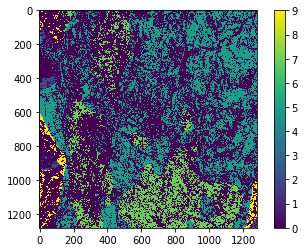

In [49]:
plt.imshow(out)
plt.colorbar()

##### load weights and predicts

In [16]:
conv.load_weights('./Segmentation/sent_ast_geo/weights-151-0.66.hdf5')

#### test on block3

In [50]:
X_id = sorted(glob.glob('./data/block{0}/test/X/*.npy'.format(block_id)), key=lambda f: int(''.join(filter(str.isdigit, f))))
X = [np.transpose(np.load(file), [1,2,0]) for file in X_id]
preds = conv.predict(np.stack(X))

In [18]:
count = 0
track = []
for i in range(5):
    tmp1 = []
    for j in range(5):
        tmp1.append(np.argmax(preds[count,:,:,:], axis=2))
        count += 1
    track.append(np.concatenate(tmp1, axis=1))
p = np.concatenate(track, axis=0)
np.save('./data/block{0}/preds_{1}.npy'.format(block_id, dtype), p)

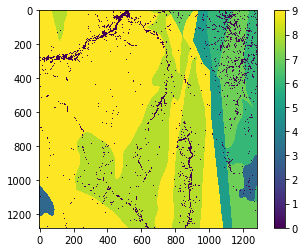

In [11]:
Y = np.load('./data/block1/Y.npy')
plt.imshow(Y)
plt.colorbar()

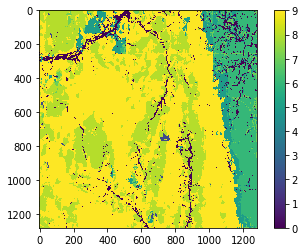

In [15]:
p2 = np.load('./data/block1/preds_sent_ast.npy')
plt.imshow(p2)
plt.colorbar()

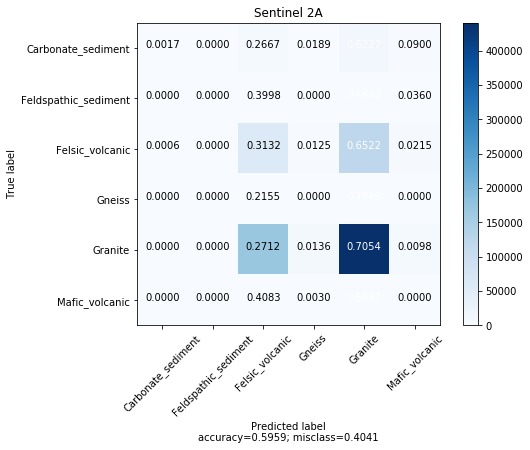

In [98]:
p1 = np.load('./data/block2/preds_sent.npy')
cm = metrics.confusion_matrix(Y.flatten(), p1.flatten(), labels=np.unique(Y)[1:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.unique(Y)[1:]], 
                      normalize=True, title='Sentinel 2A')

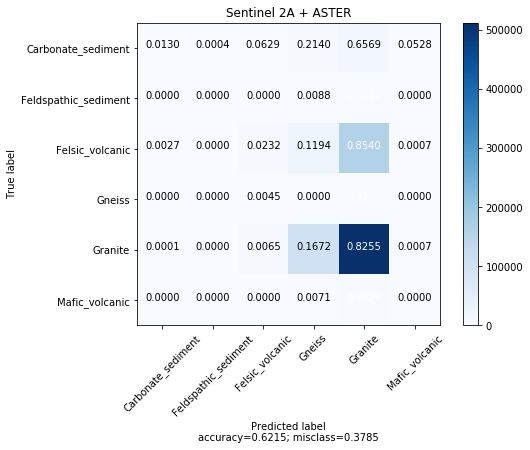

In [99]:
p2 = np.load('./data/block2/preds_sent_ast.npy')
cm = metrics.confusion_matrix(Y.flatten(), p2.flatten(), labels=np.unique(Y)[1:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.unique(Y)[1:]], 
                      normalize=True, title='Sentinel 2A + ASTER')

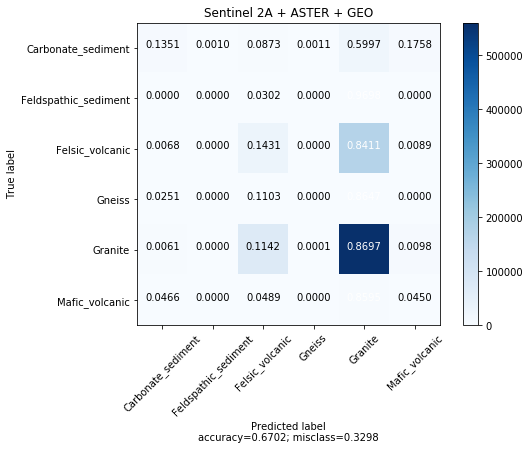

In [100]:
p3 = np.load('./data/block2/preds_sent_ast_geo.npy')
cm = metrics.confusion_matrix(Y.flatten(), p3.flatten(), labels=np.unique(Y)[1:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.unique(Y)[1:]], 
                      normalize=True, title='Sentinel 2A + ASTER + GEO')

#### test on all 3 blocks

In [15]:
Y = np.concatenate([np.load('./data/block1/Y.npy').flatten(), 
                    np.load('./data/block2/Y.npy').flatten(), 
                    np.load('./data/block3/Y.npy').flatten()])

In [16]:
p1 = np.concatenate([np.load('./data/block1/preds_sent.npy').flatten(),
                     np.load('./data/block2/preds_sent.npy').flatten(),
                     np.load('./data/block3/preds_sent.npy').flatten()])
p2 = np.concatenate([np.load('./data/block1/preds_sent_ast.npy').flatten(),
                     np.load('./data/block2/preds_sent_ast.npy').flatten(),
                     np.load('./data/block3/preds_sent_ast.npy').flatten()])
p3 = np.concatenate([np.load('./data/block1/preds_sent_ast_geo.npy').flatten(),
                     np.load('./data/block2/preds_sent_ast_geo.npy').flatten(),
                     np.load('./data/block3/preds_sent_ast_geo.npy').flatten()])

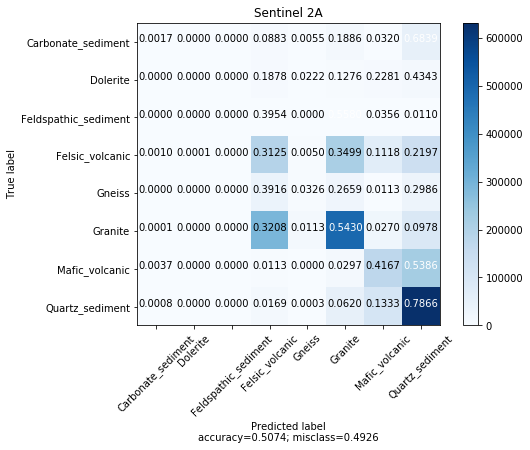

In [24]:
cm = metrics.confusion_matrix(Y, p1, labels=np.unique(Y)[1:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.unique(Y)[1:]], 
                      normalize=True, title='Sentinel 2A')

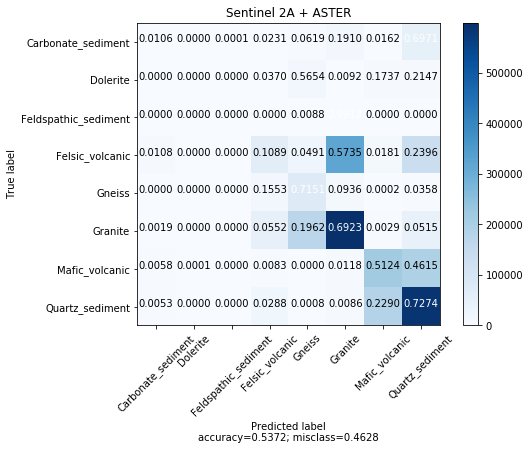

In [21]:
cm = metrics.confusion_matrix(Y, p2, labels=np.unique(Y)[1:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.unique(Y)[1:]], 
                      normalize=True, title='Sentinel 2A + ASTER')

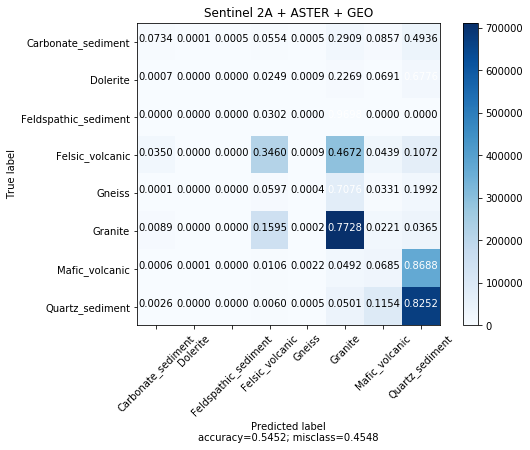

In [22]:
cm = metrics.confusion_matrix(Y, p3, labels=np.unique(Y)[1:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.unique(Y)[1:]], 
                      normalize=True, title='Sentinel 2A + ASTER + GEO')

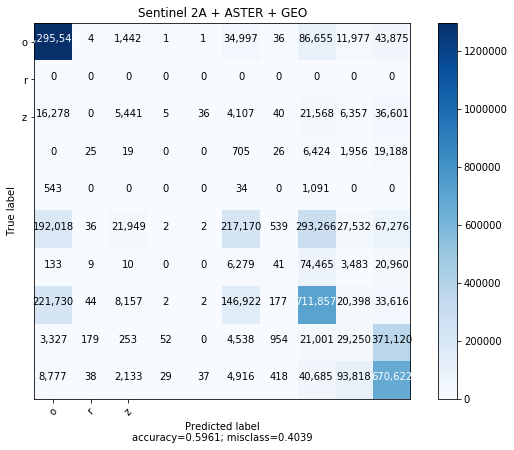

In [176]:
cm = metrics.confusion_matrix(Y, p3, labels=np.arange(10))
plot_confusion_matrix(cm, target_names='orz', 
                      normalize=False, title='Sentinel 2A + ASTER + GEO')

In [8]:
pr1, re1, fs1, s1 = metrics.precision_recall_fscore_support(Y, p1)
pr2, re2, fs2, s2 = metrics.precision_recall_fscore_support(Y, p2)
pr3, re3, fs3, s3 = metrics.precision_recall_fscore_support(Y, p3)

/Users/chenyz/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/chenyz/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


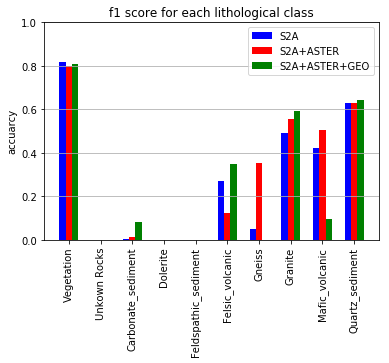

In [14]:
ax = plt.subplot(111)
plt.ylim(0., 1.)
ax.bar(np.arange(10)-0.2, fs1[:], width=0.2, color='b', align='center', label='S2A')
ax.bar(np.arange(10), fs2[:], width=0.2, color='r', align='center', label='S2A+ASTER')
ax.bar(np.arange(10)+0.2, fs[:], width=0.2, color='g', align='center', label='S2A+ASTER+GEO')
plt.xticks(np.arange(10), cls_names[:], rotation=90)
plt.ylabel('accuarcy')
plt.gca().yaxis.grid(True)
plt.title('f1 score for each lithological class')
plt.legend()

#### test on block1 with 64X64 tile size

In [3]:
_, _, _, _, X_tst, Y_tst = split_trn_vld_tst('./data/block1_64/', vld_rate=0.2, tst_rate=0.1, seed=10)

split into 3959 train, 1131 validation, 565 test samples


In [4]:
from src.DeepRock.utils import get_XY

In [5]:
X_s, Y_s = get_XY(X_tst, Y_tst, 'sent')
X_sa, Y_sa = get_XY(X_tst, Y_tst, 'sent_ast')
X_sag, Y_sag = get_XY(X_tst, Y_tst, 'sent_ast_geo')

In [6]:
s_conv = AdvSeg(dtype='sent', dim_width=64, dim_height=64)
sa_conv = AdvSeg(dtype='sent_ast', dim_width=64, dim_height=64)
sag_conv = AdvSeg(dtype='sent_ast_geo', dim_width=64, dim_height=64)
s_conv.build_SegmentationNet(n_ch_list=[64, 64])
sa_conv.build_SegmentationNet(n_ch_list=[64, 64])
sag_conv.build_SegmentationNet(n_ch_list=[64, 64])

building Segmentation U-net ...
[64, 64]
[64]
compiling Segmentation only, lr is 0.001 ...
building Segmentation U-net ...
[64, 64]
[64]
compiling Segmentation only, lr is 0.001 ...
building Segmentation U-net ...
[64, 64]
[64]
compiling Segmentation only, lr is 0.001 ...


In [7]:
s_conv.load_weights('./Segmentation/Segmentation/sent/weights-76-0.66.hdf5')
sa_conv.load_weights('./Segmentation/Segmentation/sent_ast/weights-72-0.68.hdf5')
sag_conv.load_weights('./Segmentation/Segmentation/sent_ast_geo/weights-87-0.49.hdf5')

In [8]:
p_s = s_conv.predict(X_s)
p_sa = sa_conv.predict(X_sa)
p_sag = sag_conv.predict(X_sag)

In [9]:
Y = np.argmax(Y_s, axis=3).flatten()
p1 = np.argmax(p_s, axis=3).flatten()
p2 = np.argmax(p_sa, axis=3).flatten()
p3 = np.argmax(p_sag, axis=3).flatten()

In [25]:
pr1, re1, fs1, s1 = metrics.precision_recall_fscore_support(Y, p1, labels=np.unique(Y))
pr2, re2, fs2, s2 = metrics.precision_recall_fscore_support(Y, p2, labels=np.unique(Y))
pr3, re3, fs3, s3 = metrics.precision_recall_fscore_support(Y, p3, labels=np.unique(Y))

/Users/chenyz/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


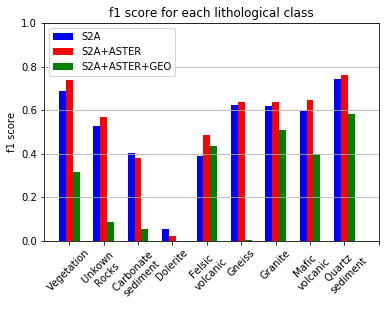

In [54]:
ax = plt.subplot(111)
plt.ylim(0., 1.)
ax.bar(np.arange(9)-0.2, fs1[:], width=0.2, color='b', align='center', label='S2A')
ax.bar(np.arange(9), fs2[:], width=0.2, color='r', align='center', label='S2A+ASTER')
ax.bar(np.arange(9)+0.2, fs3[:], width=0.2, color='g', align='center', label='S2A+ASTER+GEO')
plt.xticks(np.arange(10), [cls_names[i] for i in np.unique(Y)], rotation=45)
plt.ylabel('f1 score')
plt.gca().yaxis.grid(True)
plt.title('f1 score for each lithological class')
plt.legend()

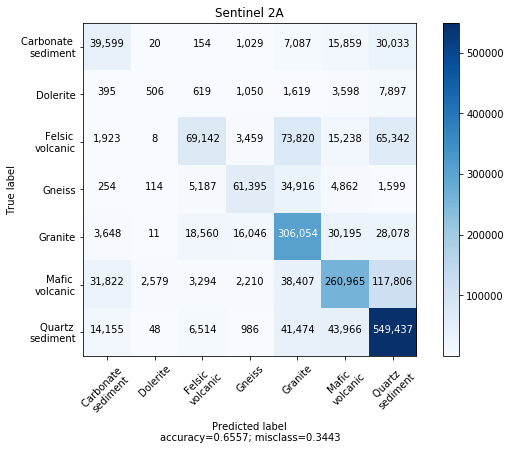

In [51]:
cm = metrics.confusion_matrix(Y, p1, labels=np.unique(Y)[2:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.unique(Y)[2:]], 
                      normalize=False, title='Sentinel 2A')

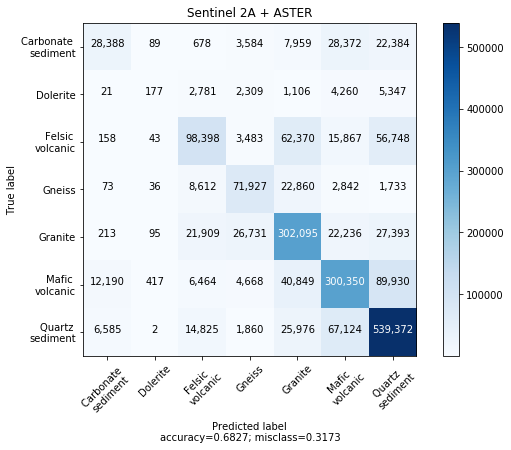

In [52]:
cm = metrics.confusion_matrix(Y, p2, labels=np.unique(Y)[2:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.unique(Y)[2:]], 
                      normalize=False, title='Sentinel 2A + ASTER')

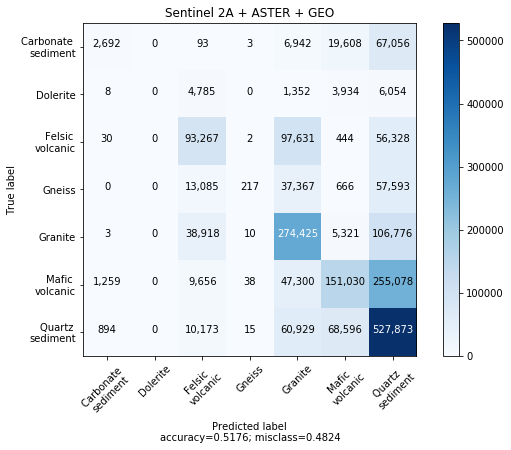

In [53]:
cm = metrics.confusion_matrix(Y, p3, labels=np.unique(Y)[2:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.unique(Y)[2:]], 
                      normalize=False, title='Sentinel 2A + ASTER + GEO')

#### calculate the accuracy

In [19]:
def acc_cls(ppreds, yy):
    acc_cls = []
    for cls in range(10):
        preds = np.copy(ppreds)
        y = np.copy(yy)
        preds[np.where(preds != cls)] = -1
        y[np.where(y != cls)] = -1
        acc_cls.append(np.where(preds == y)[0].shape[0]/y.shape[0])
    return acc_cls

In [26]:
acc_cls_s = acc_cls(p1, Y)

In [28]:
acc_cls_sa = acc_cls(p2, Y)
acc_cls_sag = acc_cls(p3, Y)

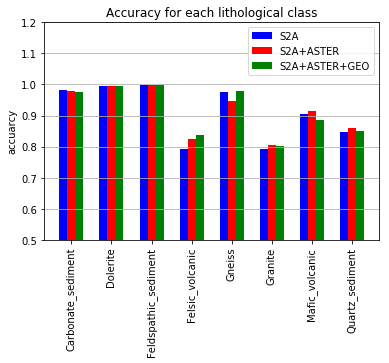

In [47]:
ax = plt.subplot(111)
plt.ylim(0.5, 1.2)
ax.bar(np.arange(8)-0.2, acc_cls_s[2:], width=0.2, color='b', align='center', label='S2A')
ax.bar(np.arange(8), acc_cls_sa[2:], width=0.2, color='r', align='center', label='S2A+ASTER')
ax.bar(np.arange(8)+0.2, acc_cls_sag[2:], width=0.2, color='g', align='center', label='S2A+ASTER+GEO')
plt.xticks(np.arange(8), cls_names[2:], rotation=90)
plt.ylabel('accuarcy')
plt.gca().yaxis.grid(True)
plt.title('Accuracy for each lithological class')
plt.legend()